In [1]:
# ── 루트 자동 고정 ───────────────────────────────────────────────────
from pathlib import Path, os, sys
p = Path.cwd()
while p != p.parent and not (p / "data" / "raw").exists():
    p = p.parent
os.chdir(p)
print("✅ 루트:", p)

# ── 한글 폰트 ───────────────────────────────────────────────────────
import matplotlib as mpl, matplotlib.font_manager as fm
fp = ("/Library/Fonts/AppleGothic.ttf"        if sys.platform.startswith("darwin")
      else "C:/Windows/Fonts/malgun.ttf"      if sys.platform.startswith("win")
      else "/usr/share/fonts/truetype/nanum/NanumGothic.ttf")
if Path(fp).exists():
    mpl.rc("font", family=fm.FontProperties(fname=fp).get_name())
mpl.rc("axes", unicode_minus=False)


✅ 루트: /Users/bichae/active-zones-report


In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os

try:
    df = pd.read_csv("data/processed/merged_annual_2024_with_flags.csv", encoding="utf-8-sig")
    print("▲ with_flags 파일 로드")
except FileNotFoundError:
    df = pd.read_csv("data/processed/merged_annual_2024.csv", encoding="utf-8-sig")
    print("▲ 기본 연간 CSV 로드 → 플래그 즉석 계산")
    metrics = ["resident_pop_2024","floating_pop_2024","estimated_sales_2024"]
    q75 = {m: df[m].quantile(0.75) for m in metrics}
    q90 = {m: df[m].quantile(0.90) for m in metrics}
    med = {m: df[m].median()          for m in metrics}
    for m in metrics:
        df[f"{m}_high25"] = df[m] >= q75[m]
        df[f"{m}_high10"] = df[m] >= q90[m]
        df[f"{m}_high50"] = df[m] >= med[m]
    df["is_active_25"] = df[[f"{m}_high25" for m in metrics]].sum(axis=1) >= 2
    df["is_active_10"] = df[[f"{m}_high10" for m in metrics]].sum(axis=1) >= 2
    df["is_active_50"] = df[[f"{m}_high50" for m in metrics]].all(axis=1)

print(f"총 상권 {len(df)}개 | 75% 활발 {df.is_active_25.sum()}개 | "
      f"90% 활발 {df.is_active_10.sum()}개 | Median 기준 {df.is_active_50.sum()}개")


▲ with_flags 파일 로드
총 상권 1571개 | 75% 활발 353개 | 90% 활발 124개 | Median 기준 423개


/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/2262803721.py:13: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/2262803721.py:13: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/2262803721.py:13: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/2262803721.py:13: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/2262803721.py:13: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566

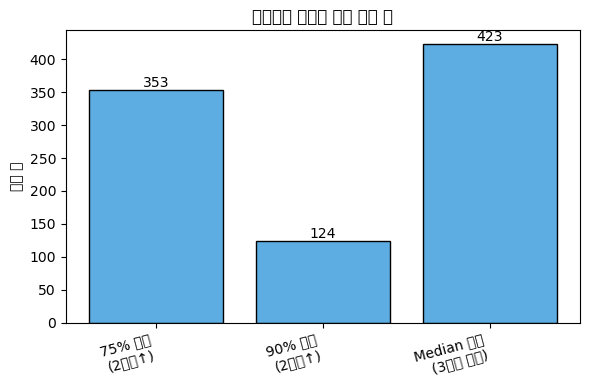

In [3]:
counts = {
    "75% 기준\n(2지표↑)": df.is_active_25.sum(),
    "90% 기준\n(2지표↑)": df.is_active_10.sum(),
    "Median 기준\n(3지표 모두)": df.is_active_50.sum(),
}
plt.figure(figsize=(6,4))
bars = plt.bar(counts.keys(), counts.values(), edgecolor="k", color="#5DADE2")
for b in bars:
    plt.text(b.get_x()+b.get_width()/2, b.get_height()+5, f"{int(b.get_height())}", ha="center")
plt.title("퍼센타일 기준별 활발 상권 수")
plt.ylabel("상권 수")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.show()
# 저장(선택)
# os.makedirs("reports/figures", exist_ok=True)
# plt.savefig("reports/figures/active_zones_bar.png", dpi=200)


/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/725585513.py:8: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.legend(); plt.tight_layout(); plt.show()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/725585513.py:8: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from font(s) DejaVu Sans.
  plt.legend(); plt.tight_layout(); plt.show()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/725585513.py:8: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.legend(); plt.tight_layout(); plt.show()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/725585513.py:8: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.legend(); plt.tight_layout(); plt.show()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/725585513.py:8: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s)

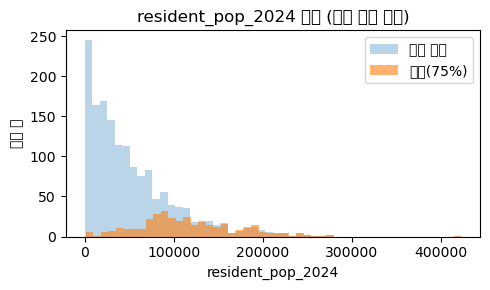

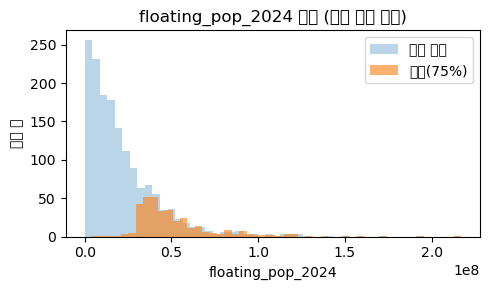

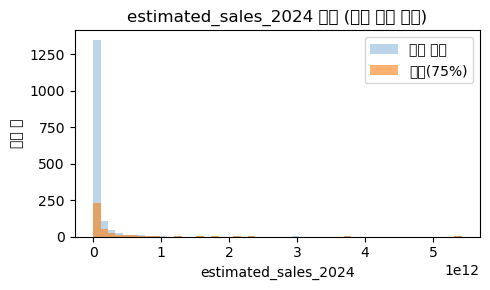

In [4]:
metrics = ["resident_pop_2024","floating_pop_2024","estimated_sales_2024"]
for m in metrics:
    plt.figure(figsize=(5,3))
    plt.hist(df[m], bins=50, alpha=0.3, label="전체 상권")
    plt.hist(df.loc[df.is_active_25, m], bins=50, alpha=0.6, label="활발(75%)")
    plt.title(f"{m} 분포 (활발 상권 강조)")
    plt.xlabel(m); plt.ylabel("상권 수")
    plt.legend(); plt.tight_layout(); plt.show()


/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/1571840015.py:9: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.legend(); plt.tight_layout(); plt.show()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/1571840015.py:9: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.legend(); plt.tight_layout(); plt.show()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/1571840015.py:9: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.legend(); plt.tight_layout(); plt.show()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/1571840015.py:9: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.legend(); plt.tight_layout(); plt.show()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/1571840015.py:9: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(

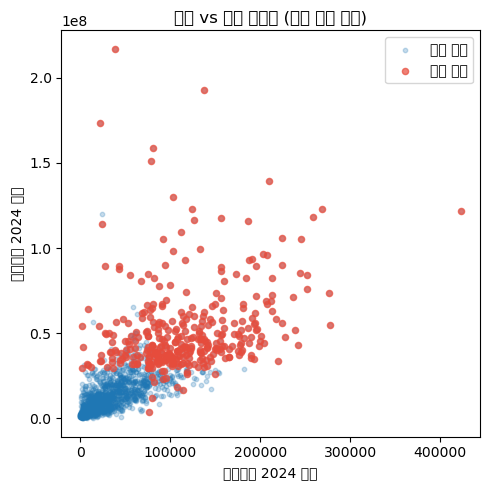

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df.resident_pop_2024, df.floating_pop_2024,
            s=10, alpha=0.25, label="전체 상권")
plt.scatter(df.loc[df.is_active_25, "resident_pop_2024"],
            df.loc[df.is_active_25, "floating_pop_2024"],
            s=20, alpha=0.7, label="활발 상권", color="#E74C3C")
plt.xlabel("상주인구 2024 합계"); plt.ylabel("유동인구 2024 합계")
plt.title("상주 vs 유동 산점도 (활발 상권 강조)")
plt.legend(); plt.tight_layout(); plt.show()


/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/2297248556.py:5: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/2297248556.py:5: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/2297248556.py:5: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/2297248556.py:5: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/2297248556.py:5: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
/va

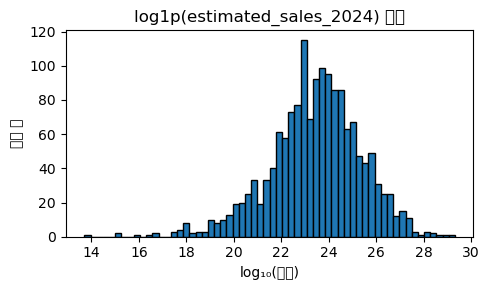

In [7]:
plt.figure(figsize=(5,3))
plt.hist(np.log1p(df["estimated_sales_2024"]), bins=60, edgecolor="k")
plt.title("log1p(estimated_sales_2024) 분포")
plt.xlabel("log₁₀(매출)"); plt.ylabel("상권 수")
plt.tight_layout(); plt.show()


In [ ]:
import pandas as pd, numpy as np

# ── 1) 연간 집계 + 플래그 CSV 로드 ─────────────────────────
df = pd.read_csv("data/processed/merged_annual_2024_with_flags.csv",
                encoding="utf-8-sig")

# ── 2) 골목·발달·관광특구 … 상권구분 붙이기 ─────────────────
cat = (pd.read_csv("data/raw/서울시 상권분석서비스(길단위인구-상권).csv",
                encoding="cp949",
                usecols=["상권_코드", "상권_구분_코드_명"])
         .drop_duplicates())
df = df.merge(cat, on="상권_코드", how="left")

# ── 3) score(세 지표 Z-점수 평균) 계산 ───────────────────────
metrics = ["resident_pop_2024",
        "floating_pop_2024",
        "estimated_sales_2024"]

for m in metrics:
    df[f"z_{m}"] = (df[m] - df[m].mean()) / df[m].std()

df["score"] = df[[f"z_{m}" for m in metrics]].mean(axis=1)

# ── 4) 상권 유형별 평균·표본 수 ──────────────────────────────
type_mean = (df.groupby("상권_구분_코드_명")["score"]
            .agg(mean="mean", count="count")
            .sort_values("mean", ascending=False))
display(type_mean)


,mean,count
상권_구분_코드_명,,
관광특구,2.866918,6
발달상권,0.457171,245
골목상권,-0.002439,1041
전통시장,-0.454013,279


In [95]:
# ───────────────────────────────────────────────────────────────────
# 1) CSV 헤더에서 자치구·행정동 컬럼 이름을 자동으로 찾아주는 함수
# ───────────────────────────────────────────────────────────────────
import re

def guess_col(patterns, columns):
    """
    columns 리스트에서 정규식 리스트(patterns)와 매칭되는
    첫 번째 컬럼명을 반환. 없으면 None.
    """
    for pat in patterns:                # 1단계: 패턴 루프
        for col in columns:             # 2단계: 컬럼 루프
            if re.search(pat, col, re.I):
                return col
    return None

In [97]:
import geopandas as gpd, glob, pprint
shp = glob.glob("data/raw/상권경계/*.shp")[0]
gdf_head = gpd.read_file(shp, encoding="utf-8", nrows=0)  # 헤더만
pprint.pprint(list(gdf_head.columns))


['TRDAR_SE_C',
 'TRDAR_SE_1',
 'TRDAR_CD',
 'TRDAR_CD_N',
 'XCNTS_VALU',
 'YDNTS_VALU',
 'SIGNGU_CD',
 'SIGNGU_CD_',
 'ADSTRD_CD',
 'ADSTRD_CD_',
 'RELM_AR',
 'geometry']


In [103]:
# df 안에 '시군구' 글자가 들어간 모든 컬럼
print([c for c in df.columns if "시군구" in c or "SIGNGU" in c])

# df 안에 '행정동' 글자가 들어간 모든 컬럼
print([c for c in df.columns if "행정동" in c or "ADSTRD" in c])


['시군구명_x', '시군구명_y']
['행정동명_x', '행정동명_y']


In [104]:
# ── 1) 두 열을 하나로 통합 (coalesce) ────────────────────────
df["시군구명"]  = df["시군구명_x"].fillna(df["시군구명_y"])
df["행정동명"]  = df["행정동명_x"].fillna(df["행정동명_y"])

# ── 2) 불필요한 _x / _y 열 제거 ────────────────────────────
df = df.drop(columns=["시군구명_x", "시군구명_y",
                      "행정동명_x", "행정동명_y"])

# ── 3) 확인 ────────────────────────────────────────────────
print(df.loc[df["상권_코드"].isin([3001492, 3120189, 3110661, 3120131]),
             ["상권_코드", "상권_코드_명", "시군구명", "행정동명"]])


        상권_코드                 상권_코드_명 시군구명  행정동명
1     3001492  명동 남대문 북창동 다동 무교동 관광특구   중구   소공동
638   3110661               강서새말어린이공원  강서구  화곡6동
1175  3120131                 가산디지털단지  금천구   가산동
1232  3120189                     강남역  서초구  서초2동


In [106]:
# 1) 머지 접미사 정리  ───────────────────────────────────────────
df["상권_구분_코드_명"] = df.filter(like="상권_구분_코드_명").bfill(axis=1).iloc[:,0]
df = df.drop(columns=[c for c in df.columns if c.startswith("상권_구분_코드_명_")])

# 2) 자치구·유형별 활발 상권 수 집계  ─────────────────────────────
summary = (df.groupby(["상권_구분_코드_명","시군구명"])["is_active_25"]
             .sum()
             .rename("활발_상권_수")
             .reset_index()
             .sort_values(["상권_구분_코드_명","활발_상권_수"], ascending=[True,False]))

print(summary.head(15))     # 상위 일부 미리보기


   상권_구분_코드_명  시군구명  활발_상권_수
24       골목상권   중랑구       18
1        골목상권   강동구       17
4        골목상권   관악구       17
3        골목상권   강서구       16
5        골목상권   광진구       16
21       골목상권   은평구       13
17       골목상권   송파구       12
10       골목상권  동대문구       11
2        골목상권   강북구       10
6        골목상권   구로구        9
16       골목상권   성북구        9
11       골목상권   동작구        8
18       골목상권   양천구        8
19       골목상권  영등포구        8
20       골목상권   용산구        8


/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/1689116610.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="활발_상권_수", y="시군구명",
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/1689116610.py:21: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/1689116610.py:21: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/1689116610.py:21: UserWarning: Glyph 44264 (\N{HANGUL SYLLABLE GOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_9566/1689116610.py:21: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) 

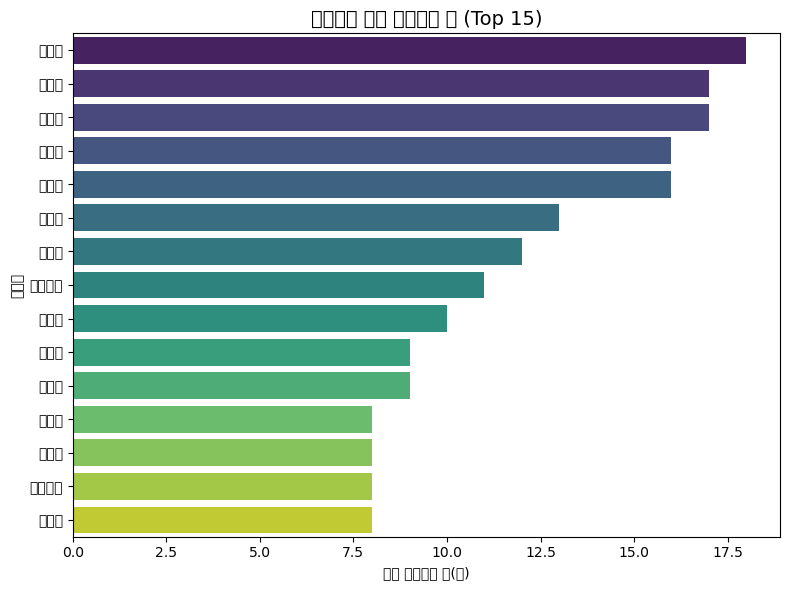

In [108]:
# 필요 라이브러리
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# ── ① 집계 데이터 준비 ──────────────────────────────────────────
# df 는 이미 '상권_구분_코드_명','시군구명','is_active_25' 컬럼이 포함돼 있어야 합니다.
summary = (df.groupby(["상권_구분_코드_명","시군구명"])["is_active_25"]
             .sum().reset_index(name="활발_상권_수"))

# 골목상권만 가져와 상위 15개 자치구 선택
g_summary = (summary.query("상권_구분_코드_명 == '골목상권'")
                      .nlargest(15, "활발_상권_수"))

# ── ② 막대차트 그리기 ─────────────────────────────────────────
plt.figure(figsize=(8, 6))
sns.barplot(x="활발_상권_수", y="시군구명",
            data=g_summary, palette="viridis")

plt.title("자치구별 활발 골목상권 수 (Top 15)", fontsize=14)
plt.xlabel("활발 골목상권 수(개)")
plt.ylabel("자치구")
plt.tight_layout()
plt.show()


In [109]:
# ── ① 교차표(피벗) 계산 ───────────────────────────────────────
pivot = (df.groupby(["상권_구분_코드_명","시군구명"])["is_active_25"]
           .sum()                    # 자치구·유형별 활발 상권 수
           .unstack(fill_value=0)    # 행=상권유형, 열=시군구
           .sort_index())            # 유형 알파벳순 정렬

# ── ② 결과 미리보기 & 저장 ────────────────────────────────────
display(pivot.iloc[:, :15])          # 열이 많으면 일부만 보기
pivot.to_excel("reports/active_zones_cross_tab.xlsx")
print("✔ 교차표 저장: reports/active_zones_cross_tab.xlsx")


시군구명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구
상권_구분_코드_명,,,,,,,,,,,,,,,
골목상권,3,17,10,16,17,16,9,3,6,7,11,8,7,6,3
관광특구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
발달상권,21,4,3,3,2,6,4,2,1,0,3,3,5,3,13
전통시장,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0


ModuleNotFoundError: No module named 'openpyxl'